In [6]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
copymaster=pd.read_csv('Copy of EndMembers(1).csv', sep=',')

In [12]:
my_dict={0:'BC-2-CRMB-5.5', 1:'BC-VG40-5.5-CG', 2:'BC-VG40-5.5-1T', 3:'BC-VG40-6.5',
         4:'BC-VG40-5.5-1FT', 5:'BC-VG40-5.5-FG', 6:'BC-VG40-5.5-WC', 7:'BC-VG40-5.5-R',
         8:'BC-VG40-5.5-NC', 9:'BC-VG40-4.5', 10:'BC-VG40-5.5-1F', 11:'BC-VG40-5.5-LTA',
         12:'BC-VG40-5.5-1T .1', 13:'BC-VG40-5.5-1F .1', 14:'BC-VG40-5.5-1FT', 15:'BC-VG40-5.5-R',
         16:'BC-VG40-5.5-W', 17:'BV-BC-VG40-5.5-RC', 18:'BV-BC-VG40-5.5-RCD'}

In [13]:
# Specify the file path
file_path = "hypercube_data.json"  # Replace with the actual file path

# Open the file and read the JSON data
with open(file_path, "r") as file:
    json_data = file.read()

# Parse the JSON data
data = json.loads(json_data)

# Convert the data to NumPy arrays
prop_list = [np.array(sublist) for sublist in data]

# Display the NumPy arrays
print(prop_list)


[array([[0.22869168, 0.25447175, 0.04147393, 0.37724702, 0.12453741,
        0.01768817, 0.16537581, 0.14150354, 0.3891914 , 0.0967779 ,
        0.47208172, 0.00420996, 0.45295871, 0.06305612, 0.41806412,
        0.2666794 , 0.09394704, 0.11271171, 0.49216033]]), array([[0.06641411, 0.27865604, 0.33205372, 0.3047601 , 0.48618543,
        0.25702981, 0.02703299, 0.10175979, 0.12333511, 0.42530186,
        0.12494661, 0.04962843, 0.06175071, 0.25657965, 0.04311053,
        0.46534916, 0.19820177, 0.43276754, 0.33061463]]), array([[0.42286223, 0.09418198, 0.0343207 , 0.08349492, 0.46224508,
        0.19405104, 0.47105294, 0.04167213, 0.11444345, 0.20289544,
        0.03069565, 0.20689056, 0.3723343 , 0.39698532, 0.40723312,
        0.45977047, 0.46921934, 0.4938482 , 0.09176119]]), array([[0.19637182, 0.28825737, 0.22283107, 0.12972533, 0.15812335,
        0.38953584, 0.33520371, 0.10599332, 0.07143222, 0.30824973,
        0.14476879, 0.22045527, 0.12962207, 0.19102281, 0.45323804,
      

In [5]:
# Specify the file path
file_path = "ex_data.json"  # Replace with the actual file path

# Open the file and read the JSON data
with open(file_path, "r") as file:
    json_data = file.read()

# Parse the JSON data
data = json.loads(json_data)

# Convert the data to NumPy arrays
extra_list = [np.array(sublist) for sublist in data]

# Display the NumPy arrays
print(extra_list)


[array([[0.39909054, 0.29650555, 0.0431928 , 0.13354743, 0.46031868,
        0.41967383, 0.13223669, 0.05200435, 0.28047329, 0.09524017,
        0.30859114, 0.00917656, 0.09000999, 0.1159087 , 0.35425319,
        0.14016108, 0.25061631, 0.38493448, 0.48858372]]), array([[0.26472858, 0.23172178, 0.0554355 , 0.19870699, 0.03364954,
        0.44138709, 0.13178195, 0.24655399, 0.08743053, 0.15633345,
        0.20490455, 0.39365858, 0.01364362, 0.427245  , 0.02992154,
        0.08983025, 0.29437711, 0.06140324, 0.1550823 ]]), array([[0.44437261, 0.18606843, 0.32706343, 0.46810362, 0.34632383,
        0.34280192, 0.48857412, 0.14605165, 0.24132986, 0.21863467,
        0.27076924, 0.29649552, 0.09761821, 0.10487413, 0.03938919,
        0.49424928, 0.22692849, 0.05451208, 0.29802257]]), array([[0.01290557, 0.28754539, 0.47516295, 0.39465941, 0.12816606,
        0.19826889, 0.0613275 , 0.099716  , 0.16833569, 0.4170147 ,
        0.00403665, 0.08746831, 0.0276161 , 0.46512846, 0.38979906,
      

In [14]:
index=np.argmax(prop_list[0])
print("maximum index: ", index)
print("distress condition related to that index: ", my_dict[index])

maximum index:  18
distress condition related to that index:  BV-BC-VG40-5.5-RCD


In [15]:
new_data=pd.DataFrame()                                        # create new empty training dataframe

for prop in prop_list:                                         # do it for every proportion list
  max_index=np.argmax(prop)                                    #find max proportion index
  distress=my_dict[max_index]
  dat=copymaster.copy()                                        # create a copy of the endmember dataframe
  for index in dat.index:                                      # traverse each row
    dat.iloc[index, 1:]=dat.iloc[index, 1:]*prop.reshape(-1)   # multiply each proportion to each reflectance in one row
  new_col=np.full(len(dat), distress)
  cat=np.full(len(dat), max_index)
  dat['Distress']=new_col                       # assign new column with that max proportion distress in the endmember dataframe
  dat['Category']=cat
  new_data=pd.concat([new_data, dat], ignore_index=True)     # append the modified endmember datadrame to the training dataframe

In [41]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297825 entries, 0 to 297824
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Wavelength (nm)     297825 non-null  float64
 1   BC-2-CRMB-5.5       297825 non-null  float64
 2   BC-VG40-5.5-CG      297825 non-null  float64
 3   BC-VG40-5.5-1T      297825 non-null  float64
 4   BC-VG40-6.5         297825 non-null  float64
 5   BC-VG40-5.5-1FT     297825 non-null  float64
 6   BC-VG40-5.5-FG      297825 non-null  float64
 7   BC-VG40-5.5-WC      297825 non-null  float64
 8   BC-VG40-5.5-R       297825 non-null  float64
 9   BC-VG40-5.5-NC      297825 non-null  float64
 10  BC-VG40-4.5         297825 non-null  float64
 11  BC-VG40-5.5-1F      297825 non-null  float64
 12  BC-VG40-5.5-LTA     297825 non-null  float64
 13  BC-VG40-5.5-1T .1   297825 non-null  float64
 14  BC-VG40-5.5-1F .1   297825 non-null  float64
 15  BC-VG40-5.5-1FT     297825 non-nul

In [7]:
# for prop in extra_list:
#   max_index=np.argmax(prop)
#   distress=my_dict[max_index]
#   dat=copymaster.copy()
#   for index in dat.index:
#     dat.iloc[index, 1:]=dat.iloc[index, 1:]*prop.reshape(-1)
#   new_col=np.full(len(dat), distress)
#   cat=np.full(len(dat), max_index)
#   dat['Distress']=new_col
#   dat['Category']=cat
#   new_data=pd.concat([new_data, dat], ignore_index=True)

In [16]:
train_data=new_data.copy()

print(new_data['Category'].unique())

[18  4 17 14  3  2  5  7 10 13  9  0 12 11 15 16  6  1  8]


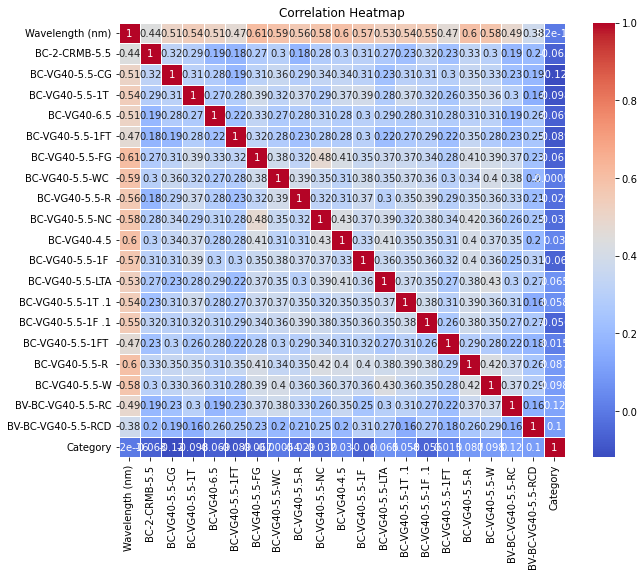

In [9]:
import seaborn as sns

correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

y=train_data['Category'].values
X=train_data.drop(columns=['Category', 'Distress'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values to search
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
}

# Create the GridSearchCV object
r_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', 
                           verbose=1, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
r_search.fit(X, y)

# Print the best hyperparameters found
print("Best Hyperparameters:", r_search.best_params_)

# Get the best estimator (model with the best hyperparameters)
best_rf_classifier = r_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_rf_classifier.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
Test Set Accuracy: 1.0


In [13]:
test_data=pd.DataFrame();


for prop in extra_list:
  max_index=np.argmax(prop)
  distress=my_dict[max_index]
  dat=copymaster.copy()
  for index in dat.index:
    dat.iloc[index, 1:]=dat.iloc[index, 1:]*prop.reshape(-1)
  new_col=np.full(len(dat), distress)
  cat=np.full(len(dat), max_index)
  dat['Distress']=new_col
  dat['Category']=cat
  test_data=pd.concat([new_data, dat], ignore_index=True)

In [43]:
Y=test_data['Category'].values
x=test_data.drop(columns=['Category', 'Distress'])

In [15]:
acc=best_rf_classifier.score(x, Y)
print(acc)

0.999119370500586


In [44]:
from sklearn.metrics import classification_report
y_pred=best_rf_classifier.predict(x)
print(classification_report(Y, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14025
           1       1.00      1.00      1.00     14850
           2       1.00      1.00      1.00     16500
           3       1.00      1.00      1.00     18150
           4       1.00      1.00      1.00     18975
           5       1.00      1.00      1.00     17325
           6       1.00      1.00      1.00     14025
           7       1.00      1.00      1.00     13200
           8       1.00      1.00      1.00     14850
           9       1.00      1.00      1.00     19800
          10       0.99      1.00      1.00     15675
          11       1.00      1.00      1.00     16500
          12       1.00      1.00      1.00     23100
          13       1.00      1.00      1.00     10725
          14       1.00      1.00      1.00     16500
          15       1.00      1.00      1.00     13200
          16       1.00      1.00      1.00     14850
          17       1.00    

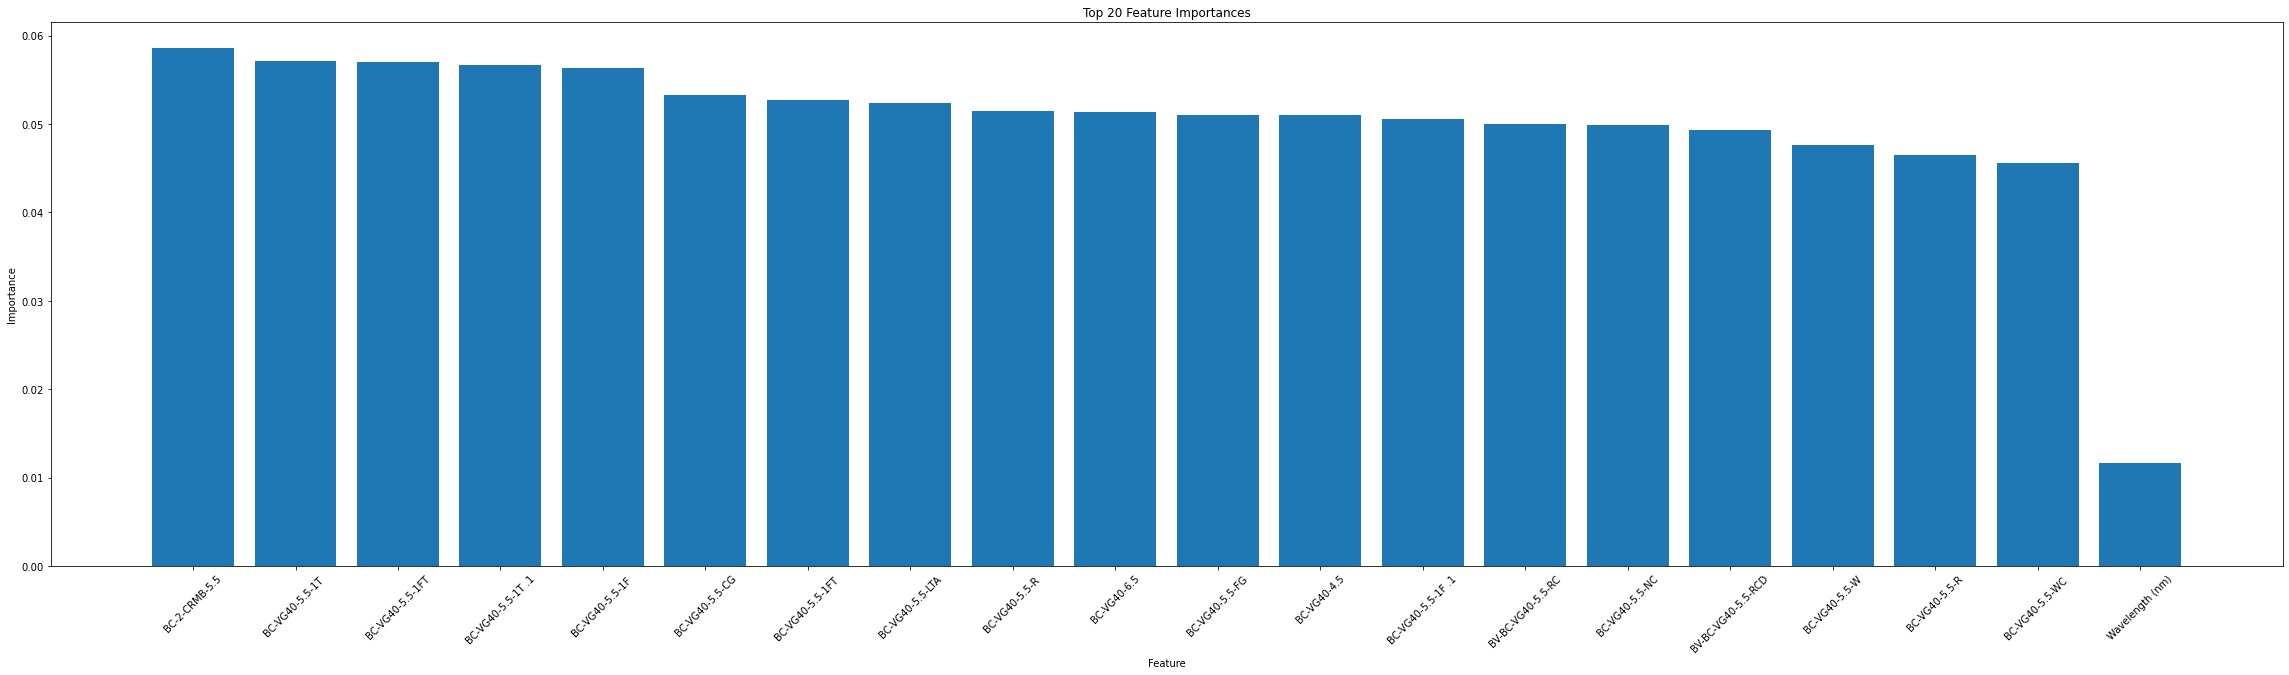

In [51]:
feature_importances = best_rf_classifier.feature_importances_

# Step 3: Plot the feature importances
def plot_feature_importances(importances, feature_names, top_n=10):
    # Sort the importances in descending order and get the indices
    indices = np.argsort(importances)[::-1]

    # Get the top_n feature names and importances
    top_feature_names = [feature_names[i] for i in indices[:top_n]]
    top_importances = importances[indices][:top_n]

    # Create a bar chart
    plt.figure(figsize=(40, 10))
    plt.bar(range(top_n), top_importances, align='center')
    plt.xticks(range(top_n), top_feature_names, rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Top {} Feature Importances".format(top_n))
    plt.show()

# Call the function to plot the top feature importances
plot_feature_importances(feature_importances, feature_names=X.columns, top_n=20)

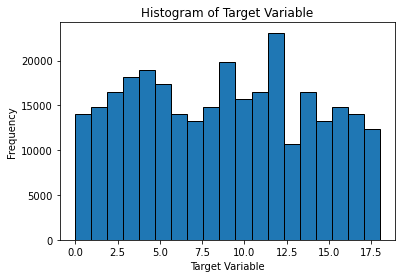

In [23]:


# Assuming 'y' is your target variable`b
plt.hist(y, bins=19, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.title("Histogram of Target Variable")
plt.show()


In [7]:
import joblib
# joblib.dump(best_rf_classifier, "./random_forest.joblib")

In [8]:

rf=joblib.load("./random_forest.joblib")

In [27]:
rfc=RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=2, min_samples_leaf=2)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=10)

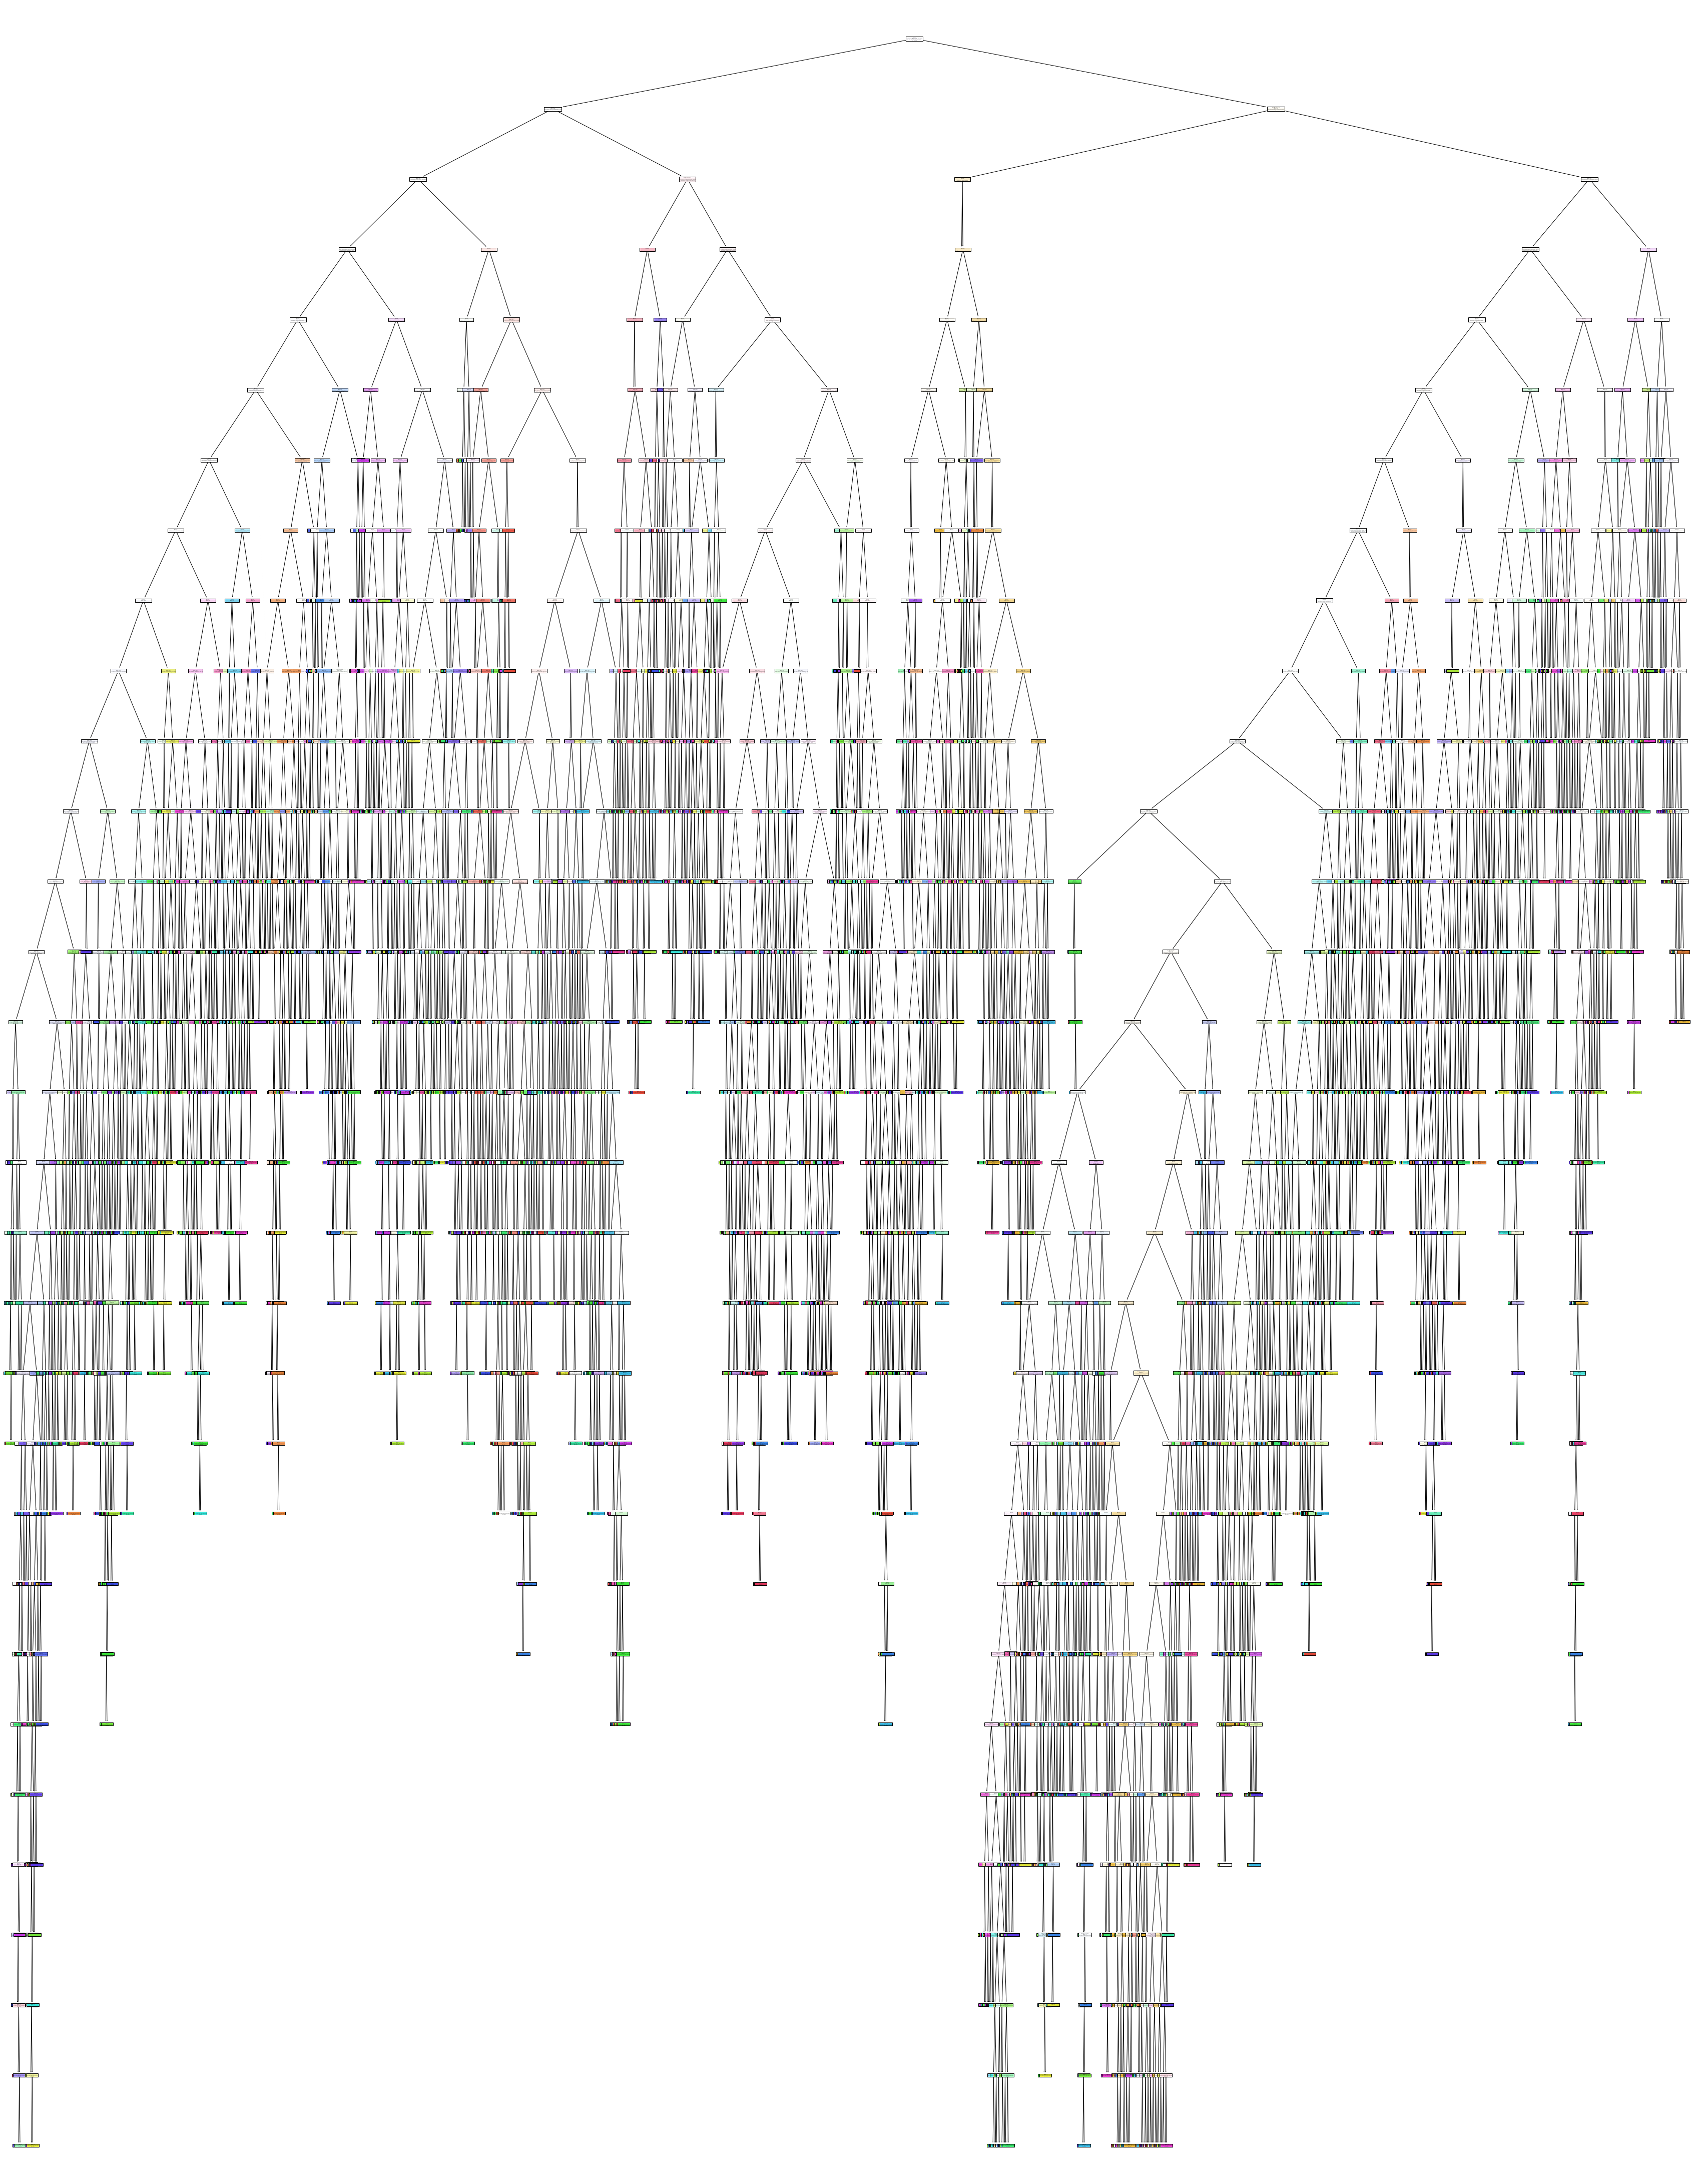

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,80))
plot_tree(rf.estimators_[0], feature_names = X_train.columns,filled=True);